### Importing the libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic=pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.shape

(418, 12)

### Analysing the data

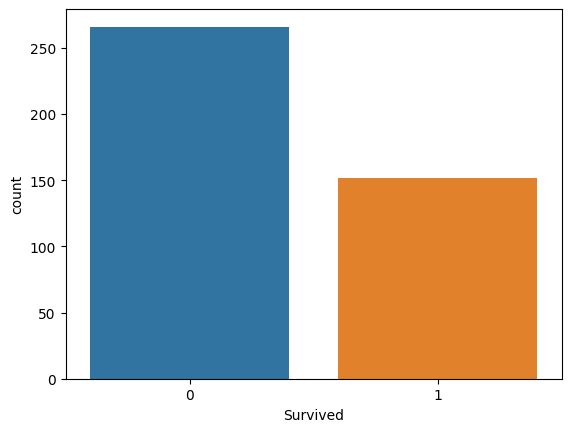

In [5]:
sns.countplot(x='Survived',data=titanic)
plt.show()

In [6]:
#Those who didn't survived(more than 250) and those who survived(around 150)

<Axes: xlabel='Survived', ylabel='count'>

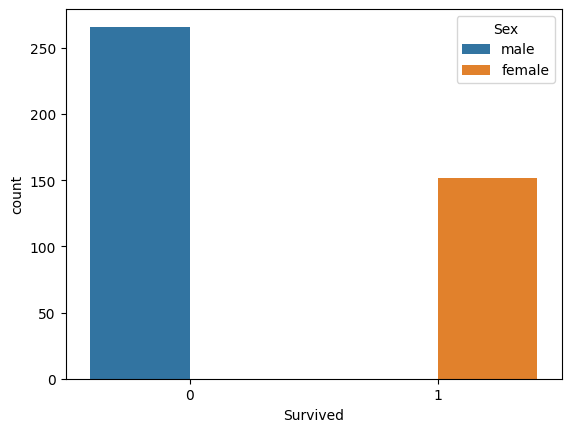

In [7]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [8]:
#This show all the male died and all the female survived

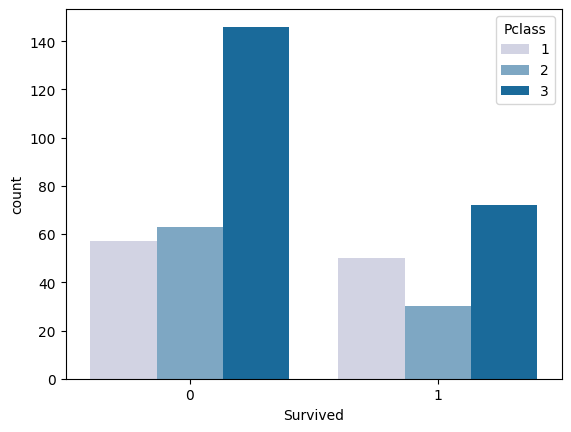

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='PuBu')
plt.show()

In [10]:
#in both cases 3rd class passenger have survived as well as  not survived

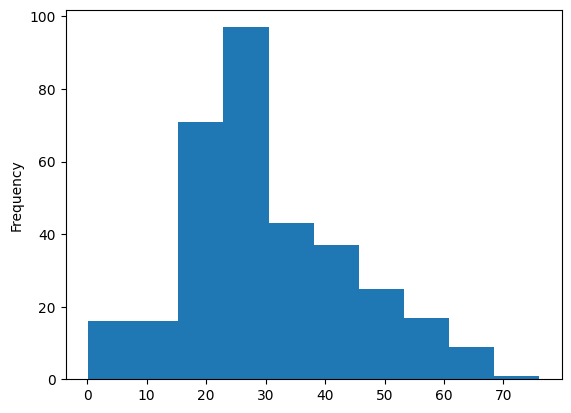

In [11]:
titanic['Age'].plot.hist()
plt.show()

In [12]:
#Highest age group travelling are between 20-30
#very few passenger are above 70

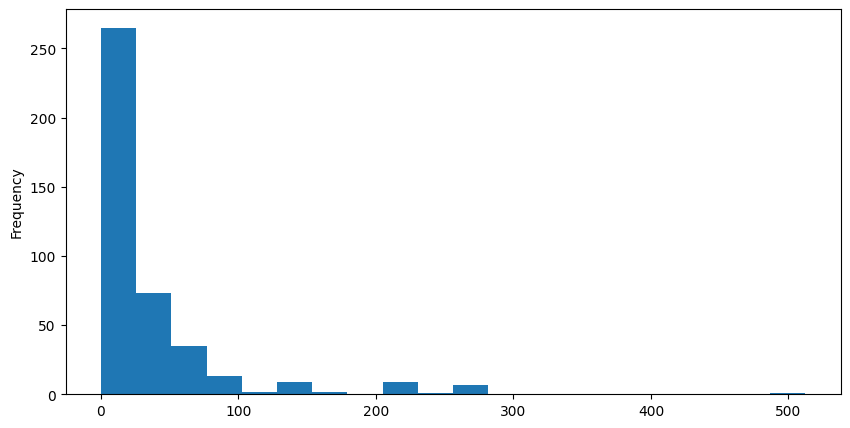

In [13]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))
plt.show()

In [14]:
#most of the ticket bought are under fare 100
#very few ticket in range of 300-500

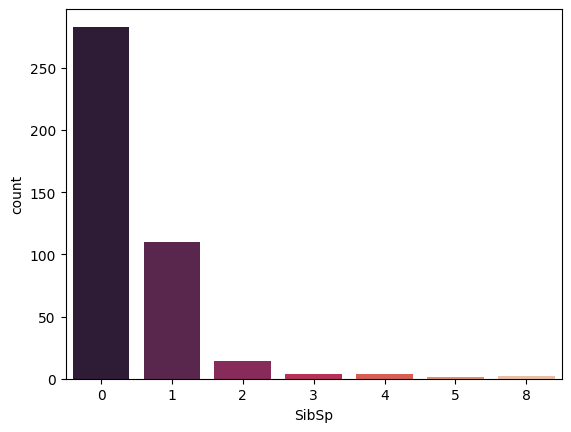

In [15]:
sns.countplot(x='SibSp',data=titanic,palette='rocket')
plt.show()

In [16]:
#most of the passenger do not have their sibling aboard

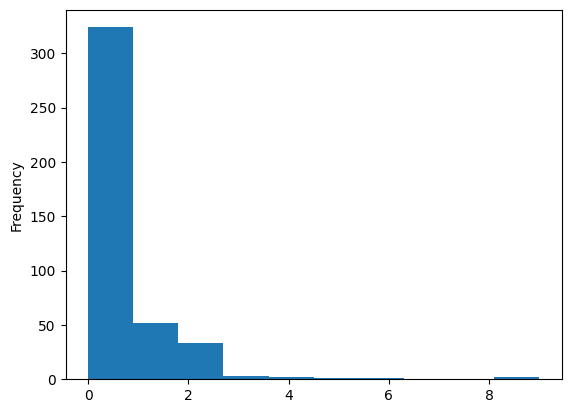

In [17]:
titanic['Parch'].plot.hist()
plt.show()

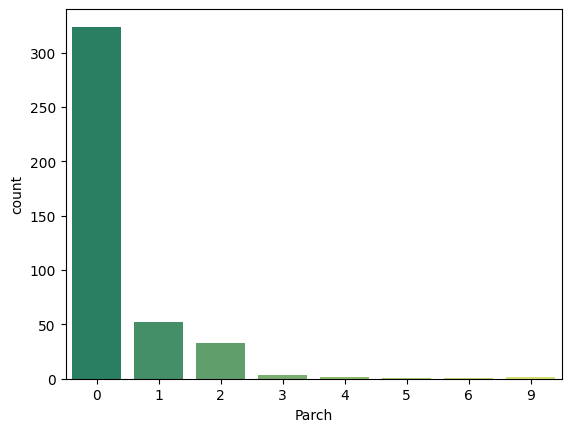

In [18]:
sns.countplot(x='Parch',data=titanic,palette='summer')
plt.show()

In [19]:
#the number of parents and siblings who aboard the ship are less

### Data Wrangling

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#age and cabin has most of the null values

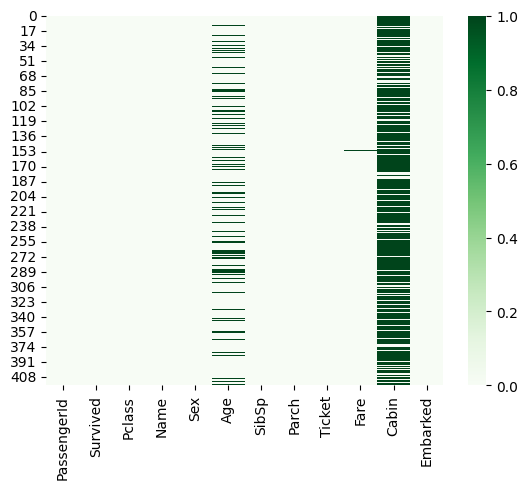

In [22]:
sns.heatmap(titanic.isnull(),cmap='Greens')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

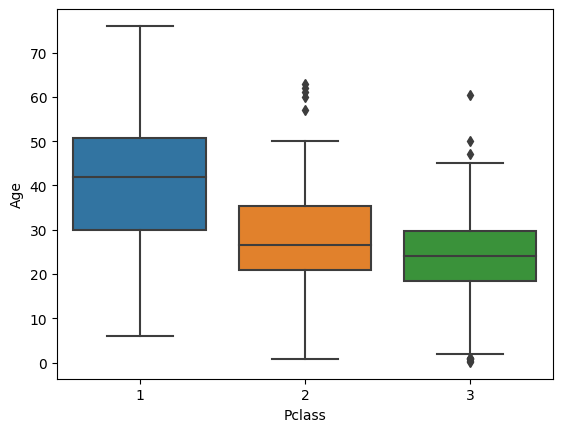

In [23]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [24]:
#older age group travelling more in class 1 & 2 compare to class 3

In [25]:
titanic.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic.head() #dropped the cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [27]:
titanic.dropna(inplace=True)

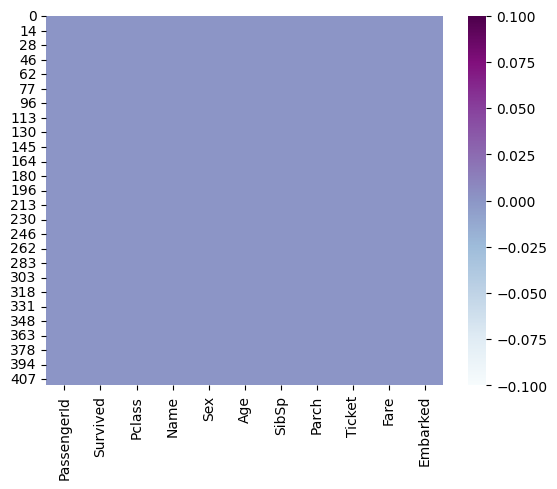

In [31]:
sns.heatmap(titanic.isnull(),cmap='BuPu')
plt.show()

In [ ]:
#This shows we don't have any null vales now.

### Model building process

In [32]:
pd.get_dummies(titanic[ 'Sex']).head(5)

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [33]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,1


In [ ]:
# we have dropped the first column because only one column is sufficient to determine
#the gender of the passanger either will ne male(1)or not(@), that means a female

In [34]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head(3)


,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0


In [ ]:
# C stands for Cherbourg, Q for Queenstown, S for Southhampton.
# we can drop any one of the column as we can infer from the two columns itself

In [35]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [36]:
Pcl=pd.get_dummies(titanic['Pclass'], drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,1
2,1,0


In [ ]:
# our data ts now converted into categorial  data

In [37]:
titanic=pd.concat([titanic, sex, embark,Pcl], axis=1)
titanic. head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0


In [38]:
#deleting the unwanted columns

In [40]:
titanic.drop(['Name', 'PassengerId', 'Pclass','Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
titanic.head(3)


,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0


### Training the model

In [42]:
x=titanic.drop('Survived', axis=1)
y=titanic['Survived']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=4)
x_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
338,25.0,0,0,31.5000,1,0,1,1,0
98,20.0,0,0,7.8542,0,0,1,0,1
174,40.0,1,5,31.3875,1,0,1,0,1
325,23.0,0,0,7.0500,1,0,1,0,1
169,22.0,0,0,8.9625,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
388,21.0,0,0,7.7500,1,1,0,0,1
106,21.0,0,0,7.8208,1,1,0,0,1
248,29.0,1,0,26.0000,0,0,1,1,0
220,30.0,1,0,13.8583,0,0,0,1,0


In [67]:
#the below code used to remove warnings and some errors
x_train.columns =x_train.columns.astype(str)
x_test.columns =x_test.columns.astype(str)
import warnings
warnings.filterwarnings("ignore")

In [68]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [69]:
prediction= lm.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        62\n           1       1.00      1.00      1.00        48\n\n    accuracy                           1.00       110\n   macro avg       1.00      1.00      1.00       110\nweighted avg       1.00      1.00      1.00       110\n'

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[62,  0],
       [ 0, 48]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

1.0

In [ ]:
#we have accuracy of 100% so this model is can handle data very efficently